Import modules to deal with data and load up test file.

Show slices of raw data as an image

In [2]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import skimage
slice_no = 73
threshold = 500
datafile = "D:/GTVdelins"
scanFile = "D:/fullscans/N01/N01_2.nii"
filenames = os.listdir(datafile)
file = os.path.join(datafile, filenames[0])
print(filenames[0])
fullScanImg = nib.load(scanFile)
fullScanData = fullScanImg.get_data()
img = nib.load(file)
img_data = img.get_data() # puts data into format plt can use
print(img_data.shape)
plt.clf()

N01_GTVdelin.nii
(410, 410, 120)


610.553143633
(66245,)


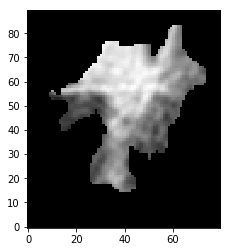

In [8]:
# function to show slices as an object
def show_slice(slice_obj):
    # Function to display row of image slices
    fig, axes = plt.subplots(1)
    axes.imshow(slice_obj, cmap="gray", origin="lower")
img_data2 = np.zeros(img_data.shape)
img_data2[np.where(img_data >0)] = fullScanData[np.where(img_data >0)]
img_data2[np.where(img_data == 0)] = 0
show_slice(img_data2[100:190,180:260,slice_no])
print(img_data2[np.where(img_data2>0)].mean())
print(img_data2[np.where(img_data2>0)].shape)
plt.show()    

(41791,)


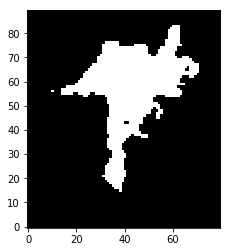

In [9]:
img_data3 = img_data2
img_data3[np.where(img_data2<threshold)] = 0
img_data3[np.where(img_data3>0)] = 1
print(img_data3[np.where(img_data3>0)].shape)
show_slice(img_data3[100:190,180:260,slice_no])
plt.show()  
plt.clf()

0.0


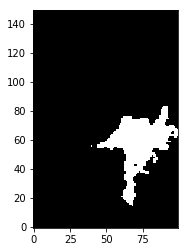

In [10]:
plt.clf()
img_data = img_data3

scan_slice = img_data[:,:,slice_no]
show_slice(img_data[100:250,150:250,slice_no]) # use 80 as default slide number for testing
print(scan_slice[30,25])
plt.show()
plt.clf()

c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


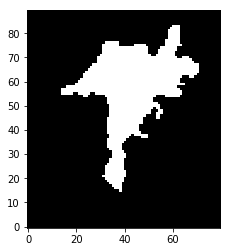

In [13]:
import scipy.ndimage
import skimage.morphology
for slice_it in range(img_data.shape[2]):
    img_data[:,:,slice_it] = scipy.ndimage.binary_fill_holes(img_data[:,:,slice_it])
    img_data[:,:,slice_it] = skimage.morphology.remove_small_objects(img_data[:,:,slice_it].astype(bool), min_size=50, connectivity=1, in_place=True)


newimg_data = np.zeros(img_data.shape)
newimg_data[np.where(img_data == True)] = 255
img_data = newimg_data
show_slice(img_data[100:190,180:260,slice_no])
plt.show()

Get pixels around the tumour in scan slice

True


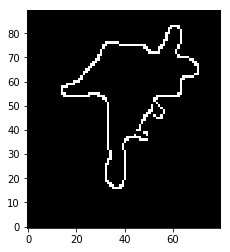

In [15]:
from skimage import feature


scan_slice = img_data[100:190,180:260,slice_no]
edges = feature.canny(scan_slice,sigma=2)
show_slice(edges) # show edges of image
print(edges.max())
plt.show()
plt.clf()

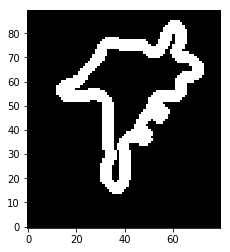

In [16]:
plt.clf()
import skimage.filters
import skimage.morphology
mask = skimage.filters.rank.maximum(edges,skimage.morphology.disk(2))
show_slice(mask)
plt.show()